### **Importando as bibliotecas necessárias**





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Carregando o dataset**

In [2]:
df = pd.read_csv('/teste_indicium_precificacao.csv') ##Fiz o upload para o colab e copiei o caminho
                                                     ## Caso esteja no jupyter, pode fazer o mesmo.

### **Análise estatística** **e explorátoria**

Nesta etapa iremos entender as features do nosso dataset, como os dados estão distribuídos e verificar a existência de valores nulos. Também utilizaremos as blibiotecas de visualização de dados para explorar o dataset com bastante atenção.

In [3]:
df.shape

(48894, 16)

In [4]:
##visualizando o dataset
df.head(5)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
##Utilizando A função "info.()" conseguimos visualizar qual tipo de dado existe em cada coluna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [6]:
##Agora vamos usar a função "nunique()" para analisar a quantidade de dados únicos
##Que existem em cada coluna. Isso nos ajuda a identificar variaveis categóricas.
df.nunique()

,0
id,48894
nome,47904
host_id,37457
host_name,11452
bairro_group,5
bairro,221
latitude,19048
longitude,14718
room_type,3
price,674


Perfeito, a partir disso conseguimos visualizar que só existem 3 tipos de quartos e 5 bairros. É importante esse tipo de informação pois assim já podemos pensar em desmembrar esse tipo de coluna em mais de uma, por meio da função "get_dummies()", ou então atribuir valores para cada nome, por exemplo: Manhattan será igual ao número "1", por meio da função labelencoder(). Muito provavelmente iremos utilizar um modelo de regressão, o que faz dessa etapa um ponto muito importante. Explicarei a razão disso com mais detalhes no momento da modelagem.

In [7]:
##Agora vamos verificar valores nulos no nosso dataset:
df.isnull().sum()
##Esse metódo ajuda a identificar a quantidade de valores nulos em cada coluna pois
##Caso seja nulo, retornará 1(booleano) e a função "sum()" vai fazer a contagem pra gente.


,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


Infezlimente há muitos valores nulos nas colunas ultima_review e reviews_por_mes(também é possível perceber que são sempre nulas juntas, as duas colunas ao mesmo tempo, por conta da mesma soma == 10052). Caso essas colunas sejam importantes para o treinamento do modelo teremos que buscar um metódo para resolver isso. Como são mais de 10 mil linhas, teremos que inserir valores. Há um outro metódo que consiste em excluir as linhas com valores nulos, contudo, não podemos fazer isso pois 10 mil linhas correspodem cerca de 20% do nosso dataset!! Exclui-lás prejudicaria demais o treinamento do modelo(Caso essas features sejam importantes, claro. Verificaremos isso no momento da modelagem)

In [8]:
##Agora vamos verificar valores iguais a zero no nosso dataset, utilizando um mecanismo semelhante ao anterior:
(df == 0).sum()


,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,11


Conseguimos notar que existem muitos apartamentos com nenhuma review feita em 10052 apartamentos, o que explica a existência de valores nulos na coluna ultima review e reviews por mes, como aquele apartamento nunca teve uma review, ele também não terá uma data de última de review e uma quantidade de reviews por mês.

Logo no início desse topico(Ánalise estatística e EDA) nós usamos .info() e vimos que a coluna ultima_review é do tipo objeto, vamos tranformar ela no tipo data (pois ela se refere a datas) usando o .to_datetime(). Também é importante saber o intervalo de tempo em que esses dados estão, por exemplo a data da ultima review mais antiga e a data da ultima review mais recente.

In [9]:
##Transformando a coluna "ultima_review" em um tipo datatime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])
df['ultima_review'].head(0)

,ultima_review


In [10]:
##Descobrindo em que intevalo de tempo estão distribuidos os dados
primeira_data = df['ultima_review'].min()
ultima_data = df['ultima_review'].max()
print(f"Intervalo das ultimas reviews\n primeira: {primeira_data}\n última: {ultima_data}")

Intervalo das ultimas reviews
 primeira: 2011-03-28 00:00:00
 última: 2019-07-08 00:00:00


Agora vamos brincar um pouco com gráficos para enterdemos melhor nosso dataset.

Vamos atrás de Informações como:


1.  O tipo de quarto influencia no preço?

2.  Qual o bairro mais caro e o mais barato?

3.  Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

4.  O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

5. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

6. As colunas latitude e longitude influenciam no preço?











***QUESTIONAMENTO 1***

---
O tipo de quarto influencia no preço?


<Axes: xlabel='room_type', ylabel='price'>

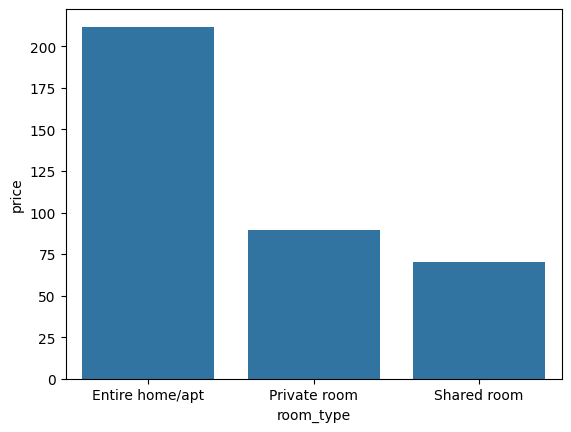

In [11]:
##Vamos descobrir a resposta do primeiro questionamento
##Para isso, usaremos o barplot da biblioteca seaborn e
##A fnção groupby()(como nas consultas em SQL) para
##Descobrimos a média por tipos de quartos:
media_tipo_quarto = df.groupby('room_type')['price'].mean().reset_index()
sns.barplot(data = media_tipo_quarto, x='room_type', y='price')
##Usei o reset_index para a variavel 'tipo_quarto' não ser considerada Series
##Mas sim um DataFrame.(Se fosse do tipo Series o código não rodaria rsrs)

Bom, já era esperado essa discrepância de valores, pois apartamentos inteiros são bem mais desejáveis que compartilhados ou que o apartamento é somente o quarto. Agora temos certeza de que o tipo de quarto é uma feature de mega importância.

***QUESTIONAMENTO 2***

---
Qual o bairro mais caro e o mais barato?


<Axes: xlabel='bairro_group', ylabel='price'>

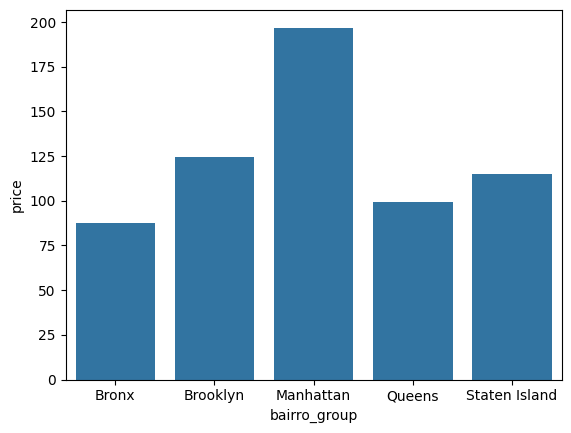

In [12]:
##Aqui faremos a mesma coisa que o primeiro questionamento,
##faremos um mean() em um groupby() no bairro_group e no preço. Vejamos:
media_price_bairro = df.groupby('bairro_group')['price'].mean().reset_index()
sns.barplot(data = media_price_bairro, x='bairro_group', y='price')

Hummmmm, aqui conseguimos visualizar que o preço sofre variação baseada na localização, e que Manhattan é o local com a maior média de preço de aluguel por noite, enquanto o Bronx é o local com a menor média(Queens está com quase a mesma média que Bronx). Essa informação é bem importante pois agora sabemos que o local é uma variável útil para o modelo fazer a precificação(por exemplo, os alugueis em Manhattan costumam ser mais caros). Mas, agora vem outro questionamento: por que Manhattan é o mais caro? Localização?(Não sei dizer se manhattan é tipo um Meireles aqui de Fortaleza), no entanto, acredito que isso esteja ligado diretamente com o tipo de quartos, Manhattan é mais caro pois tem mais apartamentos com o tipo de quarto sendo um APT inteiro, talvez?. Vamos ver se isso procede:

In [13]:
##Para verificarmos isso, faremos um value.counts() em um groupby
##Para contarmos quantas vezes cada tipo de quarto aparece em cada bairro.
##Assim conseguiremos ver em qual bairro tem o maior número
##De apartamentos com tipo de quarto inteiro
quant_rooms_type_por_bairro = df.groupby('bairro_group')['room_type'].value_counts().reset_index()
quant_rooms_type_por_bairro

,bairro_group,room_type,count
0,Bronx,Private room,652
1,Bronx,Entire home/apt,379
2,Bronx,Shared room,60
3,Brooklyn,Private room,10131
4,Brooklyn,Entire home/apt,9559
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Private room,3372


Bingo!! Teoria confirmada, o local onde mais tem apt com o quarto do tipo inteiro é Manhattan e logo em seguida vem Brooklyn, justamente o primeiro e o segundo colocado em media de preço do aluguel!!!

***QUESTIONAMENTO 3***

---

Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

**Eu não consegui compreender o que a pergunta quis dizer. Está perguntando sobre uma pessoa alugar para si mesma, ou sobre comprar um APT para alugar para outras pessoas? Vou conseiderar a segunda opção pois no final da pergunta existe o termo "compra".**

Acredito que o mais indicado seria Manhattan, pelo fator tipo de quartos. No entanto, o que mais me leva a acreditar que seja Manhattan é o seguinte questionamento: Pessoas preferem comprar/alugar algo que tenha muitas reviews, correto? Ninguém gosta de comprar um produto onde ninguém falou nada sobre, preferem comprar do lojista no qual tem mais feedbacks das pessoas sobre o produto. Dessa forma, acredito que os APT deManhattan tem uma alta quantidade de reviews se comparado com os outros bairros, o que levaria as pessaos a preferirem esse local. Vamos verificar se isso é verdade:

<Axes: xlabel='bairro_group', ylabel='numero_de_reviews'>

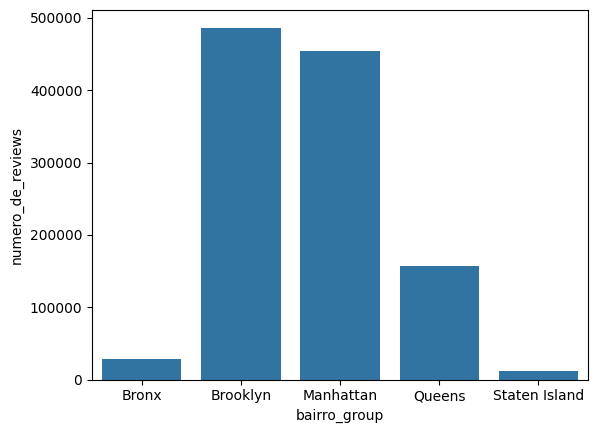

In [14]:
##Iremos usar um barplot e a função groupby da mesma forma que fizemos no
##Primeiro e no segundo questionamento:
review_por_bairro = df.groupby('bairro_group')['numero_de_reviews'].sum().reset_index()
sns.barplot(data = review_por_bairro, x = 'bairro_group', y = 'numero_de_reviews')

Não estavámos 100% corretos, o local com mais reviews é Brooklyn, o segundo lugar mais caro, no entanto, também não podemos dizer que estamos 100% errados, pois Manhattan ficou atrás por pouco. Se nos basearmos em tipo de quartos, números de reviews e retorno financeiro devido ao preço do aluguel, o local mais adequado para se investir seria Manhattan. Pois ele lidera em preço de aluguel, tipos de quartos inteiros e é o segundo lugar em quantidade de reviews.

***QUESTIONAMENTO 4***

---

O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

In [15]:
##Primeiro vamos verificar como funciona o aluguel no dataset
##Pois podem existir APT que podem ser alugados por uma noite só
##E apartamentos que somente podem ser alugados por mês
##Faremos isso usando o min() e max() como fizemos com a coluna referente a data.
min_dias = df['minimo_noites'].min()
max_dias = df['minimo_noites'].max()
print(f'A menor quantidade de noites minimas necessárias para se alugar: {min_dias}\n')
print(f'A maior quantidade de noites minimas necessárias para se alugar: {max_dias}')

A menor quantidade de noites minimas necessárias para se alugar: 1

A maior quantidade de noites minimas necessárias para se alugar: 1250


1250 noites é o máximo, ou seja, para se alugar esse apartamento teria de ser feito um contrato de mais ou menos 40 meses..? Acho que sim.




In [16]:
##Vamos verificar os APT que têm esse valor máximo
df.loc[df['minimo_noites'] == 1250]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
5766,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


informação tirada do documento do desafio : "***price - Contém o preço por noite em dólares listado pelo anfitrião***"

O preço do aluguel por noite desse APT é 180, Isso significa que, se considerarmos um contrato de aluguel mensal, o aluguel seria 180x30 = 5400. No entanto, o que queremos prever é o ***PREÇO DO ALUGUEL POR NOITE***. Vamos descobrir se a quantidade mínima de noites influencia:

In [17]:
##Para verificarmos isso, irei utilizar a func corr()(verifica
##A correlação entre as variáveis) junto de um mapa de calor(heatmap())
##Da biblioteca seaborn. vamos criar uma DataFrame com as duas
##features a serem analisadas e com a feature price(target)
df_corr = df[['minimo_noites', 'disponibilidade_365', 'price']]

<Axes: >

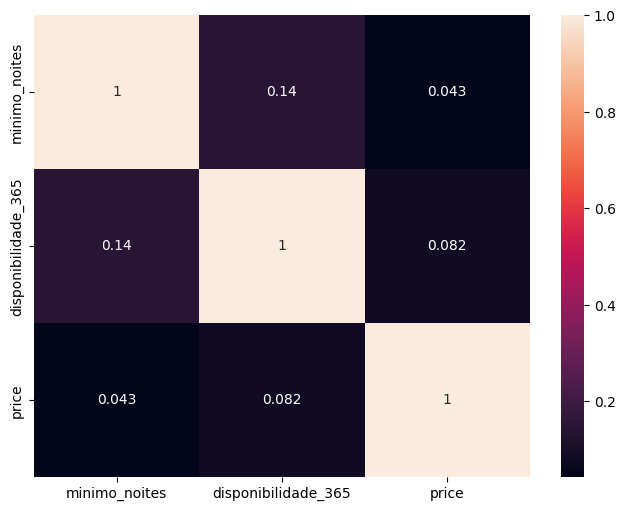

In [18]:
##Vamos gerar o heatmap para verificar as correlações:
plt.figure(figsize = (8, 6)) ##Para alterar o tamanho da figura
sns.heatmap(df_corr.corr(), annot = True)
##Corr() para pegar as correlações e annot = True para aparecer
##Os número(1, 0.14 etc)

Correlações fortes estão perto de 1 ou de -1, correlações próximas de 0 indicam praticamente nenhuma relação entre as features. Portanto, as colunas "minimo_noites" e "disponibilidade_365" **NÃO** influenciam no preço do aluguel por noite.

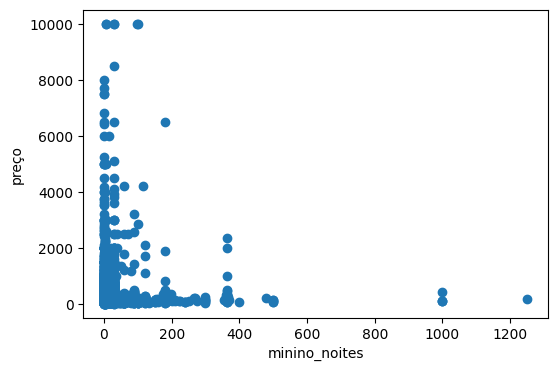

In [19]:
##Também podemos confirmar isso usando um gráfico de dispersão. Veja:
plt.figure(figsize = (6, 4))
plt.scatter(df['minimo_noites'], df['price'])
plt.xlabel('minino_noites') ##Colcoar uma "descrição" no eixo x e y
plt.ylabel('preço')
plt.show()

Bom, aqui a gente consegue visualizar que APT com o minimo de noites = 0 tem uma grande variação de valor, podendo ser valores baixos como altos. Também é possível percerber alguns outliers na coluna mínimo de noties, pois os valores estão mais concetrados no ínicio do gráfico e vemos três dados muito distantes dos outros.

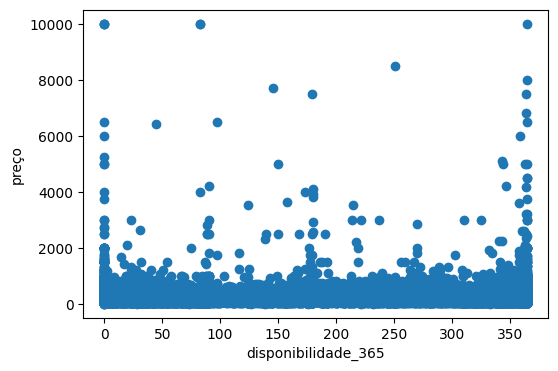

In [20]:
##Agora para a coluna disponibilidade_365
plt.figure(figsize = (6, 4))
plt.scatter(df['disponibilidade_365'], df['price'])
plt.xlabel('disponibilidade_365')
plt.ylabel('preço')
plt.show()

Como podemos ver, os dados estão totalmente dispersos e sem um padrão visível. O que indica pouca relação com nossa coluna target(preço).

***QUESTIONAMENTO 5***

---
Existe algum padrão no texto do nome do local para lugares de mais alto valor?


Para respondermos isso, algumas coisas precisam ser esclarecidas. Primeiro: A coluna "nome" se refere ao nome do hotel no qual o apartamento está localizado. Segundo: A coluna "calculado_host_listings_count" se refere a quantos apartamentos estão localizados em um único hotel. Por exemplo, caso esse valor seja 2, significa que tem dois apartamentos para serem alugados no mesmo hotel. Agora para respondermos a pergunta, pegaremos os dados do hotel onde tem mais apartamentos para serem alugados, pois assim teremos mais dados para analisar, o que ajuda em um reconhecimento de um possível padrão.

In [21]:
##Descobrindo qual o maior valor
df['calculado_host_listings_count'].max()

327

In [22]:
##Criando um dataframe somente com esse hotel que mais tem apartamentos para alugar
##Vamos utilizar o método loc[] para localizar o que queremos baseado em condições
##Nesse caso, quero achar o hotel que tem 327 apartamentos para alugar:
df_hotel_mais_frequente = df.loc[df["calculado_host_listings_count"] == 327]


In [23]:
##Visualizando os apartamentos mais caros desse hotel
df_hotel_mais_frequente.loc[df['price'] > 600]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
44029,33998142,Sonder | Wall Street | Superior 3BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70597,-74.01248,Private room,616,2,5,2019-06-12,2.46,327,255
44325,34177117,Sonder | The Biltmore | 1BR,219517861,Sonder (NYC),Manhattan,Theater District,40.76118,-73.98635,Entire home/apt,699,29,0,NaT,NaN,327,365
44344,34183825,Sonder | The Biltmore | Spacious 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Theater District,40.75942,-73.98727,Entire home/apt,699,29,0,NaT,NaN,327,332
44374,34203594,Sonder | The Biltmore | Spacious 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Theater District,40.76010,-73.98675,Entire home/apt,699,29,0,NaT,NaN,327,333
44581,34311549,Sonder | The Biltmore | Spacious 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Theater District,40.76106,-73.98647,Entire home/apt,699,29,0,NaT,NaN,327,333
44584,34312320,Sonder | The Biltmore | Stunning 1BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Theater District,40.75969,-73.98732,Entire home/apt,699,29,0,NaT,NaN,327,220
44586,34313143,Superior 1BR in FiDi by Sonder,219517861,Sonder (NYC),Manhattan,Financial District,40.70724,-74.00614,Entire home/apt,699,29,0,NaT,NaN,327,337
44589,34313960,Lovely Studio in FiDi by Sonder,219517861,Sonder (NYC),Manhattan,Financial District,40.70844,-74.00615,Entire home/apt,699,29,0,NaT,NaN,327,333
47813,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaT,NaN,327,327
47820,35937891,Sonder | 116 John | Simple Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70707,-74.00557,Entire home/apt,699,29,0,NaT,NaN,327,341


Bom, é possível perceber na nomeclatura do hotel informações como: BR(provavelmente significa bedroom, ou seja, a quantidade de quartos), "rooftop" que significa terréo/telhado, talvez?, Gym(academia), "Superior" significa que fica nos últimos andares?Provavelmente. "Spacious" que significa espaçoso e kitchen que significa cozinha.

In [24]:
##Vamos ver os mais baratos
df_hotel_mais_frequente.loc[df['price'] < 300]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
38293,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38587,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39768,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39769,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
39770,30937594,Sonder | The Nash | Brilliant Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,4,2019-06-08,0.94,327,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47685,35869234,Sonder | 116 John | Classic 1BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70852,-74.00510,Entire home/apt,198,29,0,NaT,NaN,327,345
47686,35869466,Sonder | 116 John | Classic Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70802,-74.00642,Entire home/apt,180,29,0,NaT,NaN,327,338
47690,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaT,NaN,327,339
47691,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaT,NaN,327,342


Aqui podemos ver que não aparecem palavras como cozinha, espaçoso e APT com 3 banheiros, por exemplo. Agora, finalmente respondendo a pergunta, o nome do hotel  em  ALGUNS CASOS ***INFLUENCIA NO PREÇO***, pois no nom de alguns tem informações importantes como se tem cozinha, se tem academia, se é espaçoso, já em outros não possui esse tipo de detalhamento. O ideal seria que esse tipo de informação fosse uma coluna, e não estar escrito dessa maneira em uma coluna só junto ao nome do hotel. No tópico modelagem eu explicarei o que faremos com essa coluna('nome').

***QUESTIONAMENTO 6***

---
As colunas LATITUDE e LONGITUDE influenciam no preço?



In [25]:
##Para respondermos isso, irei buscar um hotel com alguns apartamentos
##Disponíveis para servir como exemplo. Logo vocês entederão o porquê.

df['nome'].value_counts()

,count
nome,
Hillside Hotel,18
Home away from home,17
New york Multi-unit building,16
Brooklyn Apartment,12
Loft Suite @ The Box House Hotel,11
...,...
Feel at Home,1
Spacious Modern Alcove Studio in a Luxury Building,1
Artist's Room in Large Apartment,1


In [26]:
##Perfeito, vamos pegar esse Hillside Hotel para analisar:
df_hillside = df.loc[df['nome'] == "Hillside Hotel"]
df_hillside.head(18)
##Ele só aparece 18 vezes, então vamos ver todas as 18 linhas de uma vez.

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
24151,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24606,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26733,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaT,NaN,18,365
26751,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26752,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26888,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaT,NaN,18,365
26890,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaT,NaN,18,365
26891,21312191,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70259,-73.81415,Private room,135,1,0,NaT,NaN,18,365
26892,21312225,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70262,-73.81526,Private room,135,1,1,2017-12-10,0.05,18,365
26893,21312283,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70450,-73.81447,Private room,135,1,0,NaT,NaN,18,355


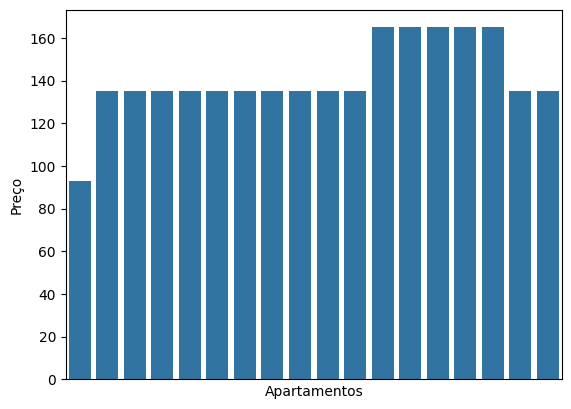

In [27]:
##Aqui podemos ver que esse hotel fica localizado no Queens.
##Vamos fazer um barplot do preço dos 18 apartamentos
sns.barplot(data = df_hillside, x = df_hillside['id'], y = df['price'])
plt.xlabel('Apartamentos')
plt.ylabel('Preço')
plt.xticks([]) ##como usamos a coluna id para indicar cada apartamento
               ##O eixo X mostraria vários ID's, com essa função conseguimos
               ##Remover esses números.
plt.show()

Vemos que esse hotel só tem apartamentos com três valores de aluguel: um custando 93US e os outros 17 custando 135US ou 165US. É possível observar que esse hotel segue um padrão de valor. No entanto, ele fica loalizado no Queens, e no Queens a média de preço, como vimos anteriormente, é 100US, então por que esse hotel está com esses valores? Bom, esse apartamento deve ter um acabamento melhor, por mais que fique nos Queens, ele deve ser mais bonito ou algo do gênero. Dessa forma, é necessário que o nosso modelo entenda não só os padrões de valores por bairro, mas também padrões de valores por hotéis. Mas como ele saberá que um apartamento tá localizado em determinado hotel se ele não sabe ler palavras? E aqui vem a resposta: latitude e longitude. Essas colunas serão essenciais para o nosso modelo identificar se um APT pertence á um mesmo hotel que um outro APT. Um exemplo para ficar mais claro: Digamos que queremos prever o preço de um apartamento no Queens, caso nós tenhamos treinado o modelo somente com o bairro, ele provavelmente diria que o preço do aluguel desse APT é por volta de 100US, pois é a média de preço no Queens. Mas e se esse apartamento estiver localizado no hillside hotel? Não seria por volta de 100US, mas sim entre 160US ou 135US, pois esses são os valores comuns no hotel hillside. Com as colunas longitude e latitude, o modelo veria que esse apartamento fica próximo as logintudes e latitudes dos apartamentos pertencentes ao hotel Hillside, trazendo uma precisão muito maior na precificação.

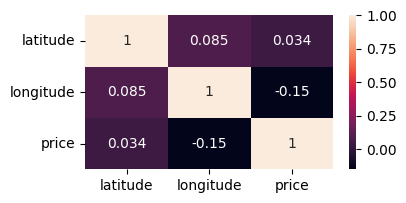

In [28]:
##Vamos ver a correlação usando um heatmap, como fizemos antes:
df_heatmap = df[['latitude', 'longitude', 'price']]
plt.figure(figsize= (4,2))
sns.heatmap(df_heatmap.corr(), annot= True)
plt.show()


Ops, parece que houve um equívoco aqui. As colunas longitude e latitude tem uma correlaão insignificante com o preço do aluguel. No entanto, é certo que hoteis seguem um padrão de preço, afinal, é possível sim existir hotéis mais caros que outros por mais que estejam em um bairro onde a média é baixa(como no exemplo acima). Portanto, chego na seguinte conclusão: As colunas longitude e latitude ***não influenciam no preço***. Contudo, precisamos usar um metódo para nosso modelo precificar apartamentos de um mesmo hotel seguindo um padrão daquele hotel, além de seguir outros padrôes, como em que bairro ele está e qual o tipo de quarto. Para isso, já que as colunas latitude e longitude não conseguem cumprir essa função, vamos utilizar as colunas host_name e host_id. Assim, o modelo vai precificar o APT também baseado em que hotel ele está. Faremso isso no momento da modelagem.

### **Modelando o dataset**

Está na hora da modelagem do nosso dataset. Nesse tópico iremos escolher as features que permanecerão (baseadas na EDA e em algumas outras observações que faremos aqui), tratar dados vazios do dataset e tratar dos outliers para posteriomente treinarmos o modelo.

Começaremos excluindo as colunas que já verificamos que NÃO influenciam, sendo elas: minimo_noites, latitude, longitude, disponibilidade_365.

In [29]:
##Usando df.drop() para excluí-lás:
df = df.drop(columns = ['minimo_noites', 'latitude','longitude','disponibilidade_365'], axis = 1)
##axis = 1 pois estou removendo COLUNAS, caso fosse igual a 0 eu estaria removendo LINHAS.

In [30]:
##Vamos verificar como nosso dataset está agora:
df.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'room_type', 'price', 'numero_de_reviews', 'ultima_review',
       'reviews_por_mes', 'calculado_host_listings_count'],
      dtype='object')

Agora vamos remover colunas que não fazem diferença para o treinamento do modelo, como o ID, host_name , o ID do host. Essas váriaveis não influcenciam no preço, pois não são informações sobre os apartamenos, mas sim um identificador e inormações sobre quem está alugando.

In [31]:
##Faremos a mesma coisa que acima:
df = df.drop(columns = ['id'], axis = 1)
##Verificando como ficou:
df.columns

Index(['nome', 'host_id', 'host_name', 'bairro_group', 'bairro', 'room_type',
       'price', 'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count'],
      dtype='object')

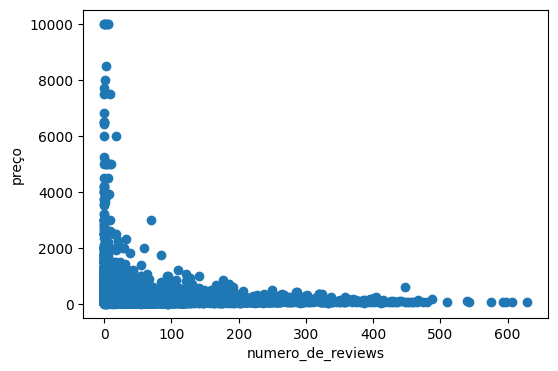

In [32]:
##Agora vamos verificar se as colunas "numero_de_reviews" e
##"reviews_por_mes" influenciam no preço, para isso usaremos um scatter,
##Como fizemos antes.
plt.figure(figsize = (6, 4))
plt.scatter(df['numero_de_reviews'], df['price'])
plt.xlabel('numero_de_reviews')
plt.ylabel('preço')
plt.show()

Conseguimos ver que, conforme um o número de reviews aumenta, o preço diminui. Nessa coluna existem muitos valores zeros, ou seja, apartamentos que nunca tiveram uma review e normalmente eles são mais caros. Vamos deixar ela.

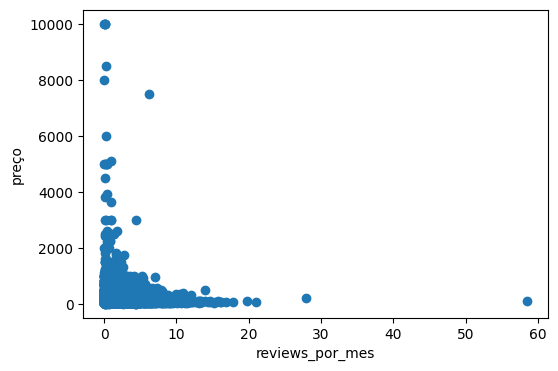

In [33]:
##Agora reviews_por_mes
plt.figure(figsize = (6, 4))
plt.scatter(df['reviews_por_mes'], df['price'])
plt.xlabel('reviews_por_mes')
plt.ylabel('preço')
plt.show()

Aqui não é possível obersvar um padrão nos dados, então vamos remover essa coluna.

In [34]:
##Como fizemos antes
df = df.drop('reviews_por_mes', axis=1)

In [35]:
##Visualizando
df.columns

Index(['nome', 'host_id', 'host_name', 'bairro_group', 'bairro', 'room_type',
       'price', 'numero_de_reviews', 'ultima_review',
       'calculado_host_listings_count'],
      dtype='object')

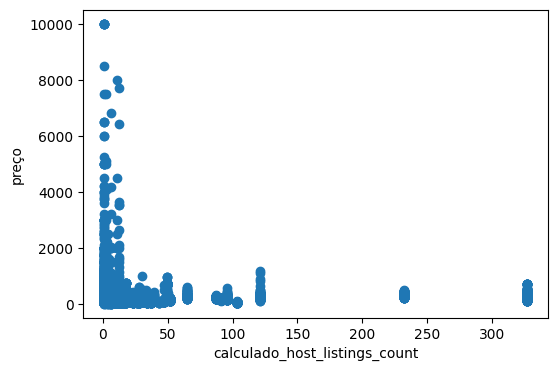

In [36]:
##Agora vamos verificar se a coluna "calculado_host_listings_count"
##influencia no preço, para isso também utilizaremos o scatter.
plt.figure(figsize = (6, 4))
plt.scatter(df['calculado_host_listings_count'], df['price'])
plt.xlabel('calculado_host_listings_count')
plt.ylabel('preço')
plt.show()

Sobre essa feature, sinceramente, olhando apenas para o gráfico não consigo afirmar se deixo ou não. farei um teste com e sem ela na hora do treino e então decido. Por enquanto, ela fica.

Agora só restaram as colunas ['nome', 'host_id', 'host_name', 'bairro_group', 'bairro', 'room_type','price', 'numero_de_reviews', 'ultima_review', 'calculado_host_listings_count'], explica o porquê elas ficarão no modelo: A coluna nome, como vimos antes, tem informações importantes para gente, também tem nomes qu se repetem, então o modelo vai conseguir achar um padrão. A coluna host_name usaremos para fazer uma nova coluna que será a média de preço de cada host e a host_id para o modelo conseguir identificar que um apartamento pertence a um determinado hotel. Assim, ele não só verá em que hotel aquele apartamento está, como tambpem saberá a média de preço daquele hotel. A coluna bairro group identificamos que importa para os preços, sendo Manhattan e Brooklyn os locais mais caros, deixaremos ela e faremos uma nova coluna contendo a média de cada bairro. Room_type ficará pois o tipo de quarto também influencia, quartos inteiros são BEM mais caros que compartilhados, verificamos isso anteriormente também. A coluna bairro(especie de sub-bairro para cada bairro) vai ficar pois precisamos de váriaveis mais espécificas pro nosso modelo ter uma maior precisão, ele deve aprender também um padrão de preço para cada subbairro, não se limitar apenas no BAIRRO, também criaremos uma coluna com a média de preço para cada subbairro. A coluna price é o nosso target e a coluna ultima_review nós excluiremos, pois tem 12k de NaN e não queremos trabalhar com datas.

Agora preciso deixar algo claro: Estamos em um caso de regressão, pois precisamos precificar um apartamento, caso fosse classificação, nós estariamos fazendo o moedelo dizer se o apartamento tem um preço baixo, médio ou alto, por exemplo. Mas aqui queremos dar um valor exato. Outro ponto, que modelos usaremos? Inicialemnte, achei que usariamos regressão linear, simples, fácil e obejtiva, no entanto, Estamos trabalhando com muitas variaveis categóricas, isso não seria um problema, pois usariamos um label ou get dummies e resolveria. Contudo, uma das colunas categoricas que temos é BAIRRO, onde existem mais de 220 valores únicos, como fariamos um get dummies nisso? Caso fizessemos, estariamos criando novas 220 colunas, isso é inviável. Poderíamos fazer um label e tranformar em número, como 0,1,2,3, contudo, o modelo de regresão não lida bem com isso, pois ele poderia pensar que existe uma relação númerica nesses valores, mas não existe. Portanto, precisamos usar essas colunas do jeito que elas estão, com STRINGS, mas regressão linear não tem suporte para isso. Então, chegamos na conclusão, usaremos o modelo CatBoostRegressor, da biblioteca catboost, pois ele consegue lidar diretamente com varivaeis categoricas sem uma necessidade de pré-processamento. Só precisamos mudar o tipo das colunas para categóricas e MÁGICA!Ele faz o resto sozinho. Poderíamos usar outros modelos que se baseiam em gradient boosting, como XGBoost ou LightGBM, pois diferente da regressão linear, eles saberiam lidar com o label encondig. Mas o catboost faz o que esses outros dois fazem porém sem precisar desse pré-processamento extra, então ele é bom por isso. O lado negativo é que ele possui muits hiperparametros e precisamos usar bem eles, o que torna um pouco mais complexo.

Agora faremos as seguintes coisas, nesta ordem:


1.   Trataremos valores nulos e outliers e excluíremos a coluna referente a data

2.   Mudaremos o tipo das colunas consideradas categóricas(são str, vamos mudar para category, pois o catboostRegressor tem isso como requisito)

3. Criaremos as colunas novas as quais eu disse(media por bairro, por
 bairro_group e por host_name), para o modelo ter mais informações para aprender sem se basear apenas em colunas categoricas(terá colunas númericas que o ajudarão na precisão)





***Trataremos valores nulos e outliers e excluíremos a coluna referente a data***

---


In [37]:
##Excluindo a coluna ultima_review
df = df.drop('ultima_review', axis = 1)

In [38]:
##Vamo ver como nosso dataset está em relação a valores nulos
df.isnull().sum()

,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
room_type,0
price,0
numero_de_reviews,0
calculado_host_listings_count,0


Como esses valores nulos são poucos e também são nomes(não sãonem categóricas nem valores) vamos apenas exclui-las.

In [39]:
##Excluindo usando dropNA
df = df.dropna() ##Isso vai excluir todas as linhas onde tem valores nulos

In [40]:
##Vendo se funcinou
df.isnull().sum()

,0
nome,0
host_id,0
host_name,0
bairro_group,0
bairro,0
room_type,0
price,0
numero_de_reviews,0
calculado_host_listings_count,0


In [41]:
##Agora vamos ver valores zeros na coluna target(preço), pois não podem existir apt gratuitos:
##Vamos usar o loc com um filtro de se for igual a zero, mostre.
df.loc[df['price'] == 0]

,nome,host_id,host_name,bairro_group,bairro,room_type,price,numero_de_reviews,calculado_host_listings_count
23160,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,1,4
25432,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,55,4
25633,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,16,5
25752,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,12,2
25777,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,3,1
25793,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,93,6
25794,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,95,6
25795,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,95,6
26258,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,0,1
26840,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,2,6


In [42]:
##Caso fossem muitas linhas com 0, o ideal seria inputar valores, como colocar
##A média do bairro correspondente, mas como são só 12 linhas, exluiremos.
df = df.drop(index = [23160, 25432, 25633, 25752, 25777, 25793, 25794, 25795, 26258, 26840, 26865], axis = 0)
## Index ao invés de columns pois estamos falando das linhas, axis = 0 pois corresponde as linhas.

Agora vamos verificar os outliers. Aqui é um ponto delicado. Explicarei o porquê.


In [43]:
##Vamos ver como estão distribuidos os preços usando describe():
df['price'].describe()

,price
count,48846.000000
mean,152.774782
std,240.250956
min,10.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


Aqui vemos que os preços estão entre 10US e 10000US(esse 10k provavelmete é um outlier absurdo). Usarei a linha que contém esse apartamento que possui o aluguel de 10 mil para explicar o porquê será dificl tratar esses outliers.

In [44]:
##Buscando esse apartamento:
df.loc[df['price'] == 10000]

,nome,host_id,host_name,bairro_group,bairro,room_type,price,numero_de_reviews,calculado_host_listings_count
9150,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,Private room,10000,2,1
17691,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,Entire home/apt,10000,5,1
29237,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,Entire home/apt,10000,0,1


Perfeito, existem três que custam 10k. Como podemos ver, esses apartamentos ficam no Queens, Brooklyn e Manhattan, dois deles tem tipo de quarto sendo o apartamento inteiro e um sendo apenas um quarto privado, agora precisamos saber, por que eles custam 10 mil? Não tem como saber, simples. O dataset não tem informações suficiente para nos dizer o motivo deles custarem 10 mil - não da maneira tradicionla -, pois se olharmos para a coluna "nome" veremos q o primeiro é um apartamento de luxo, mas como o modelo vai saber que ele é um apartamento de luxo? Catboost é um modelo de machine learning como os outros, não um avançado que se baseia em deep learning. Ele não vai conseguir saber que é um apartamento de luxo, pra ele, esse apartamento que fica no Queens é igual um outro que custa só 200US, a diferença é que esse custa 10 mil, mas ele não consegue identificar o porquê dessa diferença absurda. São os detalhes que nos fazem entender o porquê de um apt ser caro, como ter cozinha, ser de luxo, ser espaçoso, mas esses detalhes não estão como colunas, estão embutidas dentro do nome do hotel, o que dificulta tudo. Portanto, o nosso modelo provavelmente NÃO vai se sair bem na precificação de apartamentos caros, pois a informação que explica o porque dele ser caro fica em uma coluna que ele não consegue entender muitos padrões e nem ler o que ta escrito, mesmo categorizando ela. Conclusão: iremos ver quantos preços existem acima do limite superior do boxplot e, caso sejam poucas linhas, iremos **excluir todas elas**, pois só irão confudir o modelo, porque no dataset não tem informação que explique pra ele esse preço absurdo.

In [45]:
##Vamos fazer um código simples para ver quantos valores existem acima do limite superior
q1 = 69 ##primeiro quartil
q3 = 175 ##terceiro quartil
intervalo = q3 - q1 ##intervalo é o 3 quartil menos o 1 quartil
limite_sup = q3 + (1.5*intervalo) ##O limite superior para não ser considerado outlier é o
                                  ## tereiro quartil mais o intervalo mutiplicado por 1.5
print(limite_sup)

334.0


In [46]:
##Os outliers do nível superior serão os valores maiores que o limite, no caso 334.
##vamos criar um df só com os outliers superiores e ver quantas linhas tem usando o shape:
df_outliers_sup = df.loc[df['price'] > 334]
df_outliers_sup.shape

(2971, 9)

In [47]:
##Visualizando o dataset principal
df.shape

(48846, 9)

O DF principal tem 48k de linhas, como os outliers superiores são só 2971 linhas não teremos muitas perdas. Lembrando, estamo fazendo isso pois o modelo tem informações suficientes para precificar apartamentos de baixo valor, mas não tem o suficiente para precificar altos valores.

In [48]:
##Para remover é simples
##Dessa forma, filtra para que a coluna price tenha apenas
##Valores iguais ou menores que 334
df = df[df['price'] <= 334]

In [49]:
##Conferindo
df['price'].max()


334

***Mudaremos o tipo das colunas consideradas categóricas***

In [50]:
##Vamos verificar os tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45875 entries, 0 to 48893
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   nome                           45875 non-null  object
 1   host_id                        45875 non-null  int64 
 2   host_name                      45875 non-null  object
 3   bairro_group                   45875 non-null  object
 4   bairro                         45875 non-null  object
 5   room_type                      45875 non-null  object
 6   price                          45875 non-null  int64 
 7   numero_de_reviews              45875 non-null  int64 
 8   calculado_host_listings_count  45875 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.5+ MB


In [51]:
##Mudando para o tipo category as colunas:
##['host_id', 'nome','host_name','bairro_group','bairro', 'room_type']
##Vamos utilizar o astype() e passar a lista
df[['host_id', 'nome','host_name','bairro_group','bairro', 'room_type']] = df[['host_id','nome','host_name','bairro_group','bairro', 'room_type']].astype('category')

In [52]:
##Conferindo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45875 entries, 0 to 48893
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   nome                           45875 non-null  category
 1   host_id                        45875 non-null  category
 2   host_name                      45875 non-null  category
 3   bairro_group                   45875 non-null  category
 4   bairro                         45875 non-null  category
 5   room_type                      45875 non-null  category
 6   price                          45875 non-null  int64   
 7   numero_de_reviews              45875 non-null  int64   
 8   calculado_host_listings_count  45875 non-null  int64   
dtypes: category(6), int64(3)
memory usage: 5.0 MB


***Criaremos as colunas novas as quais eu disse(media por bairro, por bairro_group e por host_name), para o modelo ter mais informações para aprender sem se basear apenas em colunas categoricas(terá colunas númericas que o ajudarão na precisão)***

In [53]:
##Vamos criar a váriaveis com as médias de cada coluna
media_por_bairro = df.groupby('bairro')['price'].mean()
media_por_bairro_group = df.groupby('bairro_group')['price'].mean()
media_por_host_name = df.groupby('host_name')['price'].mean()

<ipython-input-53-32bcd5ca888c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_bairro = df.groupby('bairro')['price'].mean()
<ipython-input-53-32bcd5ca888c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_bairro_group = df.groupby('bairro_group')['price'].mean()
<ipython-input-53-32bcd5ca888c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_host_name = df.groupby('host_name')['price'].me

In [54]:
##Vamos usar a função map() para adicionar as novas variaveis no dataset:
df['media_por_bairro'] = df['bairro'].map(media_por_bairro)
df['media_por_bairro_group'] = df['bairro_group'].map(media_por_bairro_group)
df['media_por_host_name'] = df['host_name'].map(media_por_host_name)

In [55]:
##Vericando
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45875 entries, 0 to 48893
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   nome                           45875 non-null  category
 1   host_id                        45875 non-null  category
 2   host_name                      45875 non-null  category
 3   bairro_group                   45875 non-null  category
 4   bairro                         45875 non-null  category
 5   room_type                      45875 non-null  category
 6   price                          45875 non-null  int64   
 7   numero_de_reviews              45875 non-null  int64   
 8   calculado_host_listings_count  45875 non-null  int64   
 9   media_por_bairro               45875 non-null  float64 
 10  media_por_bairro_group         45875 non-null  category
 11  media_por_host_name            45875 non-null  float64 
dtypes: category(7), float64(2), int64(3)


Chegamos ao fim desse notebook, espero que tenham curtido!! Agora, irei para um outro notebook treinar o modelo e o salvarei como .pkl.